# O Espaço de Cor HSV

Neste *notebook* mós vamos explorar um espaço de cor muito útil e intuitivo: o HSV (Hue, Saturation, Value - Matiz, Saturação e Valor).

Uma das grandes vantagens de trabalhar com o espaço de cor HSV é a facilidade de trabalhar com 'canais' de cor específicos. Isso pode ser muito útil para várias tarefas de processamento de imagens, como identificar a cor dominante em uma imagem ou segmentar objetos por cor.

Ao longo deste notebook, vamos explorar o espaço de cor HSV em mais detalhes e experimentar várias técnicas úteis de processamento de imagens que fazem uso desse espaço de cor.

## Entendendo o Espaço de Cores HSV

Ao trabalhar com imagens digitais, o espaço de cor é um componente essencial. Em muitas situações, o espaço de cor RGB (Vermelho, Verde e Azul) é o mais comumente usado. No entanto, ele não é muito intuitivo para nós, humanos. É aqui que o espaço de cor HSV entra.

O espaço de cor HSV é mais próximo de como os humanos percebem a cor, tornando-o um espaço de cor intuitivo para trabalhar. Ele é representado por um sistema de coordenadas cilíndricas:

* Matiz (Hue): É o ângulo no sistema de coordenadas cilíndricas, e representa a cor "pura". Varia de 0 a 180 em softwares como OpenCV, mas pode variar de 0 a 360 em outros contextos.
* Saturação: Este é o eixo radial no sistema de coordenadas cilíndricas. A Saturação representa a "pureza" da cor, indo de 0 (sem cor, tons de cinza) a 255 (cor pura).
* Valor (Value): Este é o eixo vertical no sistema de coordenadas cilíndricas. O Valor representa o brilho da cor, variando de 0 (preto) a 255 (branco).

No espaço de cores HSV, o componente Matiz representa o comprimento de onda dominante da luz, variando entre 0 a 360 graus. A Saturação, por outro lado, representa a pureza (ou intensidade) de uma cor. Um valor de saturação mais alto indica uma cor mais vívida e vibrante, enquanto um valor mais baixo representa uma cor mais desbotada ou semelhante a pastel. Por último, o componente Valor representa o brilho ou a luminosidade de uma cor. Um valor mais alto corresponde a uma cor mais brilhante, enquanto um valor mais baixo representa uma cor mais escura.

Uma informação muito importante e que merece destaque, é que no OpenCV, a Matiz tem valores de 0 a 180, enquanto a Saturação e o Valor estão compreendidos no *range* de 0 a 255. Isso significa que no OpenCV os valores de H 179, 178, 177, e assim por diante, estão tão próximos do verdadeiro VERMELHO quanto os valores de H 1, 2, 3.

Compreender essas nuances do espaço de cores HSV, especialmente como implementado no OpenCV, pode ajudar em várias aplicações de visão computacional e processamento de imagem. Ele oferece uma maneira mais robusta de manipular cores e alcançar efeitos desejados em comparação com o espaço de cores RGB tradicional.


In [20]:
# Baixar as imagens que serão usadas no notebook
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/apple.jpg
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/hexapod.png

--2024-07-09 18:21:01--  https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/apple.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132734 (130K) [image/jpeg]
Saving to: ‘apple.jpg.1’

apple.jpg.1         100%[===================>] 129.62K  --.-KB/s    in 0.007s  

2024-07-09 18:21:01 (18.3 MB/s) - ‘apple.jpg.1’ saved [132734/132734]

--2024-07-09 18:21:01--  https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/hexapod.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 529157 (517K) [

In [21]:
# Importando as bibliotecas necessárias
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import plotly.express as px
import matplotlib.pyplot as plt

# Configurando os parâmetros de exibição de imagens e gráficos
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

%matplotlib inline

In [29]:
# A sua imagem da maçã
maca = cv2.imread('apple.jpg')
maca = cv2.cvtColor(maca, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(maca)

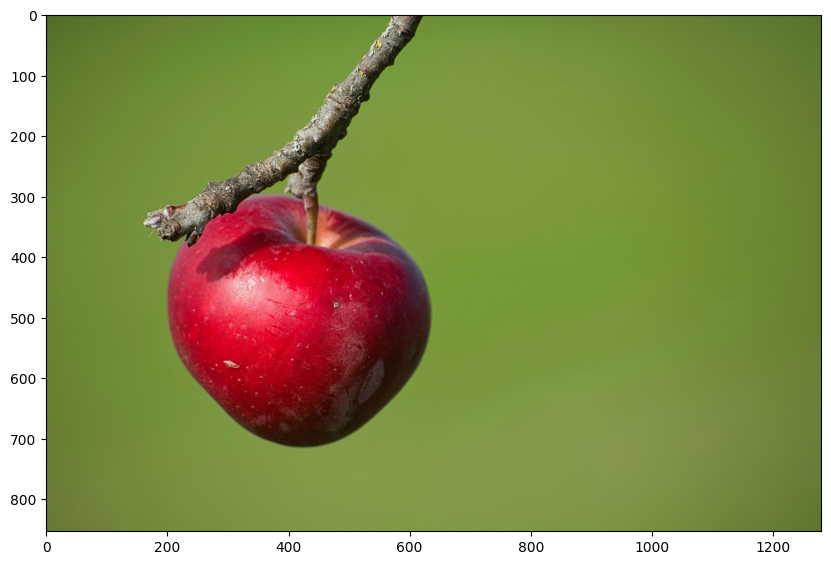

In [30]:
plt.imshow(maca)

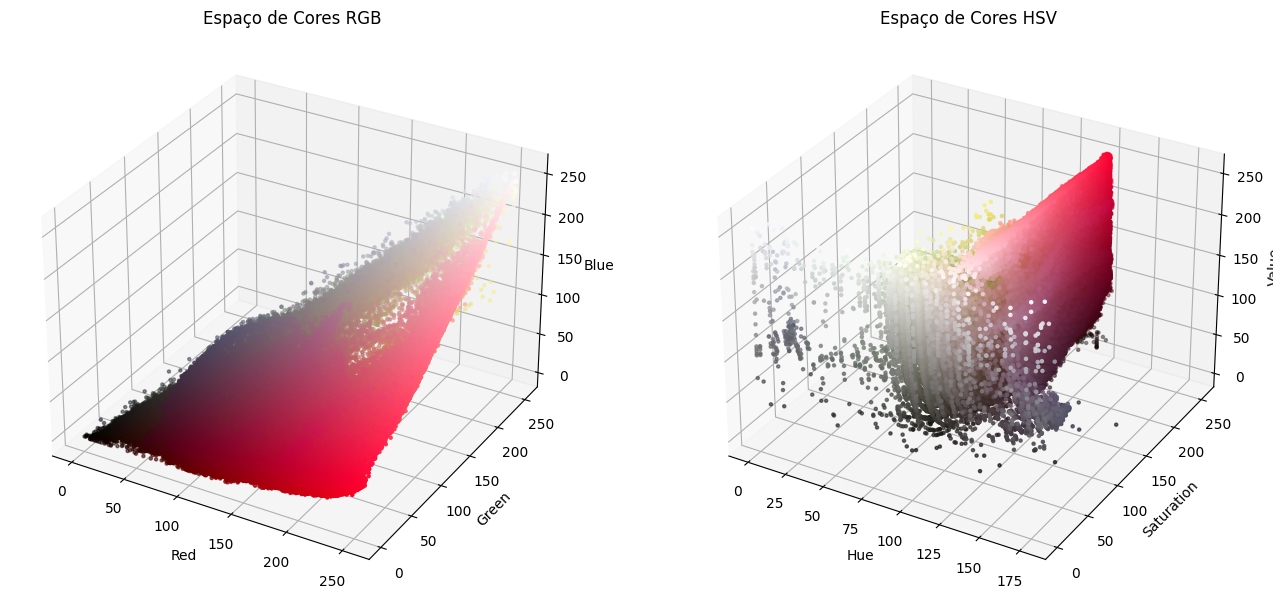

In [31]:
# Criando a figura para conter os dois subplots
fig = plt.figure(figsize=(16, 8))

# Plot RGB
axis_rgb = fig.add_subplot(1, 2, 1, projection="3d")
pixel_colors = maca.reshape((np.shape(maca)[0] * np.shape(maca)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis_rgb.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis_rgb.set_xlabel("Red")
axis_rgb.set_ylabel("Green")
axis_rgb.set_zlabel("Blue")
axis_rgb.set_title("Espaço de Cores RGB")

# Conversão para HSV e plot
hsv_maca = cv2.cvtColor(maca, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_maca)

axis_hsv = fig.add_subplot(1, 2, 2, projection="3d")
axis_hsv.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis_hsv.set_xlabel("Hue")
axis_hsv.set_ylabel("Saturation")
axis_hsv.set_zlabel("Value")
axis_hsv.set_title("Espaço de Cores HSV")

# axis_hsv.view_init(elev=30, azim=0)

plt.show()

Como podemos ver no código acima, este trecho importa as bibliotecas necessárias para nossa tarefa de encontrar a cor dominante em uma imagem. Importamos o `numpy` para operações numéricas, `cv2` para funcionalidades de visão computacional e `matplotlib.pyplot` para visualizar imagens e gráficos. O comando `%matplotlib inline` garante que os gráficos sejam exibidos diretamente no Jupyter Notebook ou no ambiente IPython. As linhas de código subsequentes configuram os parâmetros para a exibição de imagens e gráficos, como o tamanho da figura, o mapa de cores e o método de interpolação. Essas configurações nos ajudam a visualizar as imagens e gráficos em um formato desejado.

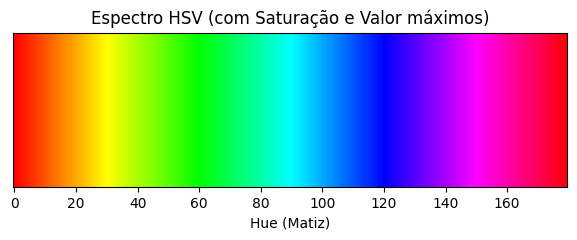

In [32]:
# Cria uma matriz de zeros para representar o espaço de cores HSV
hsv_spectrum = np.zeros((50, 180, 3), dtype=np.uint8)

# Define a saturação e o valor máximos para todo o espectro
hsv_spectrum[:,:,1] = 255  # Saturação
hsv_spectrum[:,:,2] = 255  # Valor

# Para cada coluna, define o Hue igual ao índice da coluna
for i in range(180):
    hsv_spectrum[:,i,0] = i

# Converte a imagem HSV para RGB
rgb_spectrum = cv2.cvtColor(hsv_spectrum, cv2.COLOR_HSV2RGB)

# Cria o gráfico
plt.figure(figsize=(10,2))  # você pode ajustar o tamanho conforme necessário
plt.imshow(rgb_spectrum)
plt.yticks([])  # Remove os yticks
plt.xlabel("Hue (Matiz)")
plt.title("Espectro HSV (com Saturação e Valor máximos)")

# Exibe o gráfico
plt.show()

Acima, você pode ver que o código fornecido demonstra como criar um espectro de cores no espaço de cores HSV. O código começa criando um array numpy de zeros para representar o espaço de cores HSV. Os canais de saturação e valor são definidos em seus valores máximos em todo o espectro. Em seguida, para cada coluna, o canal de matiz (hue) é definido para o valor do índice correspondente. A seguir, a imagem HSV é convertida para RGB usando a função `cv2.cvtColor()`. Finalmente, o espectro RGB é exibido usando `plt.imshow()`. O gráfico resultante mostra o espectro de cores no espaço de cores HSV com saturação e valor máximos.

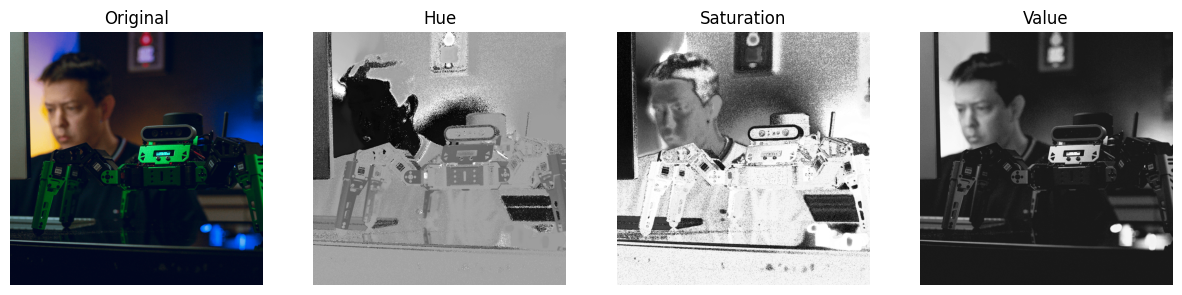

In [33]:
# Lê a imagem a partir do arquivo
img = cv2.imread("hexapod.png")

# Exibe a imagem original
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img[...,::-1])
plt.title("Original")
plt.axis('off')

# Converte a imagem de BGR para HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Para cada canal HSV, exibe sua respectiva imagem em escala de cinza
components = ['Hue', 'Saturation', 'Value']
for i in range(3):
    plt.subplot(1, 4, i+2)
    plt.imshow(hsv_img[:,:,i], cmap='gray')
    plt.title(f"{components[i]}")
    plt.axis('off')

Vamos dar uma olhada mais de perto no que está acontecendo aqui. O código começa lendo uma imagem de um arquivo usando a função `cv2.imread()` e armazenando-a na variável `img`. Em seguida, a imagem original é exibida usando `plt.imshow()` e o título correspondente é definido. A função `plt.subplot()` é usada para criar uma grade de subplots e, para cada canal da imagem HSV (Hue, Saturation e Value), um subplot é criado para exibir a respectiva imagem em escala de cinza usando `plt.imshow()`. O argumento `cmap='gray'` garante que as imagens sejam exibidas em escala de cinza. Os títulos dos subplots são definidos com os nomes dos componentes HSV. Este trecho de código nos permite visualizar a imagem original e seus componentes HSV.

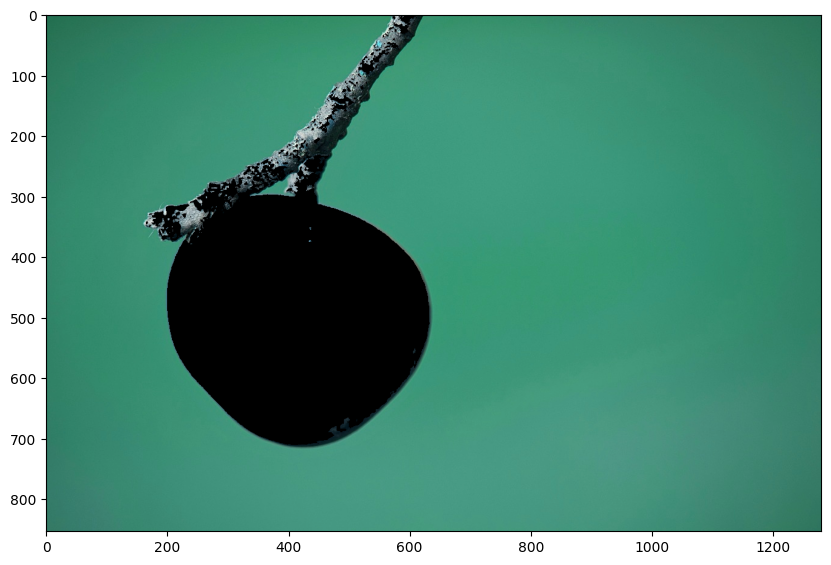

In [34]:
maca_hsv = cv2.cvtColor(maca, cv2.COLOR_BGR2HSV)

lower = np.array([30, 0, 0])
upper = np.array([100, 255, 255])

mask = cv2.inRange(maca_hsv, lower, upper)

res = cv2.bitwise_and(maca_hsv, maca_hsv, mask=mask)
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
plt.imshow(res);